# test-1

Original step-14

11 dic 2024

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

def make_plots(file_name,reference_file_name=None):
  data = pd.read_csv(file_name)
  pd.options.display.float_format = '{:.10e}'.format  # 10 digits of precision
  print(data)

  if reference_file_name is not None:
    reference_data = pd.read_csv(reference_file_name)

  plt.figure(figsize=(13, 6))  # Adjust the figure size for two plots

  plt.subplot(1, 2, 1)  # Second subplot (bottom)
  plt.loglog(data['DoFs'], data['ex POINT err'],"r-+", linewidth=1.0, label='Exact Error')
  plt.loglog(data['DoFs'], data['est err'],"g-+", linewidth=1.0, label='Estimated Error')
  if reference_file_name is not None:
    plt.loglog(reference_data['DoFs'], reference_data['ex POINT err'],"b:+", linewidth=0.5, label='GlobRef exact error (Reference)')
  plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
  plt.ylabel('Error', fontsize=12)
  plt.title('Exact vs Estimated POINT error', fontsize=14)
  plt.legend()
  plt.grid(True, which="both", linestyle='--', linewidth=0.5)

  plt.subplot(1, 2, 2)  # First subplot (top)
  plt.loglog(data['DoFs'], data['ex POINT err'], "r-+", linewidth=0.5, label='Exact Error')
  plt.loglog(data['DoFs'], abs(data['ex POINT err']-data["est err"]),"y-+", linewidth=0.5, label='Error in [computed value + estimated error]')
  plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
  plt.title('Exact error and residual', fontsize=14)
  plt.legend()
  plt.grid(True, which="both", linestyle='--', linewidth=0.5)

  # Adjust layout and show the plots
  plt.tight_layout()
  plt.show()

### config-1

Glob-ref

   cycle  cells   DoFs     ex POINT err               L2               H1  \
0      0     48     72 1.0173365408e-03 3.3549460989e-02 2.2582748759e-01   
1      1    192    240 3.1829960611e-04 4.0327568414e-02 2.5311420860e-01   
2      2    768    864 1.2359470841e-04 4.2105433978e-02 2.5986478180e-01   
3      3   3072   3264 5.2539818312e-05 4.2596697767e-02 2.6168068936e-01   
4      4  12288  12672 2.1935892607e-05 4.2739029176e-02 2.6219461192e-01   
5      5  49152  49920 9.0218548800e-06 4.2782428103e-02 2.6234752727e-01   

      std FLUX err          est err   Cons. FLUX err  
0 0.0000000000e+00 7.0238504569e-04 0.0000000000e+00  
1 0.0000000000e+00 2.4326723633e-04 0.0000000000e+00  
2 0.0000000000e+00 9.4552753474e-05 0.0000000000e+00  
3 0.0000000000e+00 4.0971694440e-05 0.0000000000e+00  
4 0.0000000000e+00 1.7302056480e-05 0.0000000000e+00  
5 0.0000000000e+00 7.1397558450e-06 0.0000000000e+00  


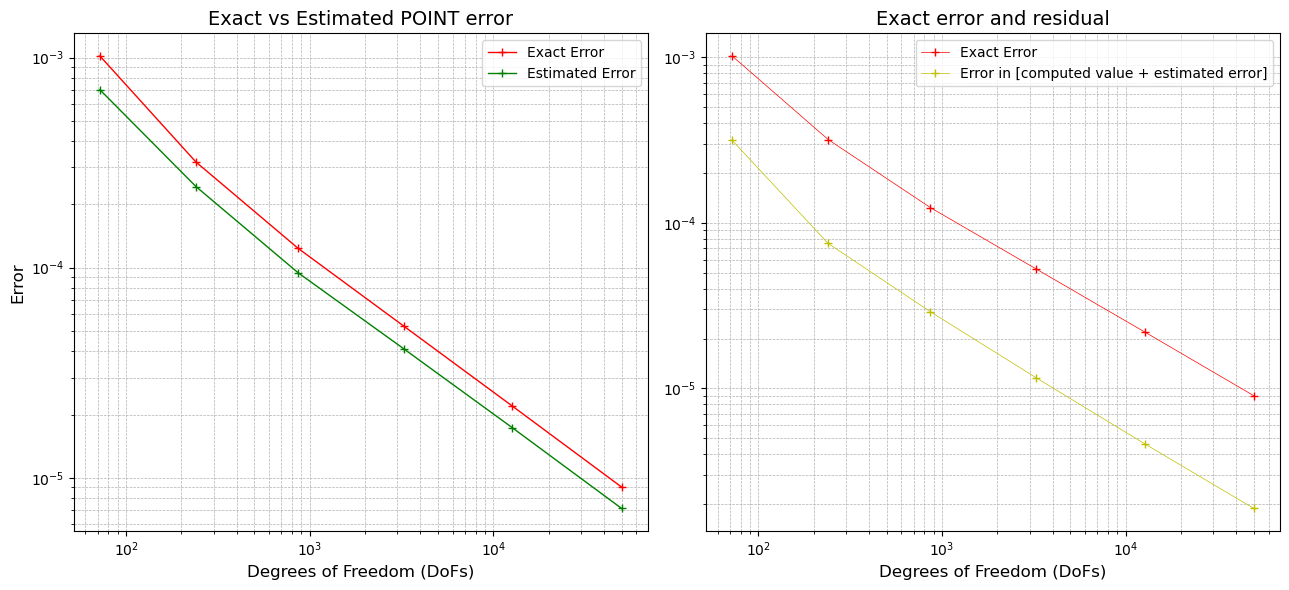

In [8]:
make_plots("./results/config-1/convergence_results.csv")

### config-2

Dual-weighted estiamtor

   cycle  cells   DoFs     ex POINT err               L2               H1  \
0      0     48     72 1.0173365408e-03 3.3549460989e-02 2.2582748759e-01   
1      1     45     67 9.6461797386e-04 1.6473577099e-02 1.0936361045e-01   
2      2     96    130 4.8542137706e-04 2.2247713490e-02 1.4614209516e-01   
3      3    243    307 2.5385861996e-04 2.6684577599e-02 1.7547517401e-01   
4      4    618    718 7.9840048551e-05 3.1824115913e-02 2.0487201983e-01   
5      5   1485   1665 3.9003807256e-05 3.3411763359e-02 2.1062151397e-01   
6      6   3573   3975 1.6281279746e-05 3.9788208929e-02 2.5035009860e-01   
7      7   8388   8934 6.6680900150e-06 3.7951344723e-02 2.3803639833e-01   
8      8  20739  21799 2.8596349680e-06 4.1345692052e-02 2.5676457400e-01   
9      9  47442  49410 1.3054609510e-06 4.2347393545e-02 2.6065703619e-01   

      std FLUX err          est err   Cons. FLUX err  
0 0.0000000000e+00 7.0238504569e-04 0.0000000000e+00  
1 0.0000000000e+00 8.8895251558e-04 0.0000

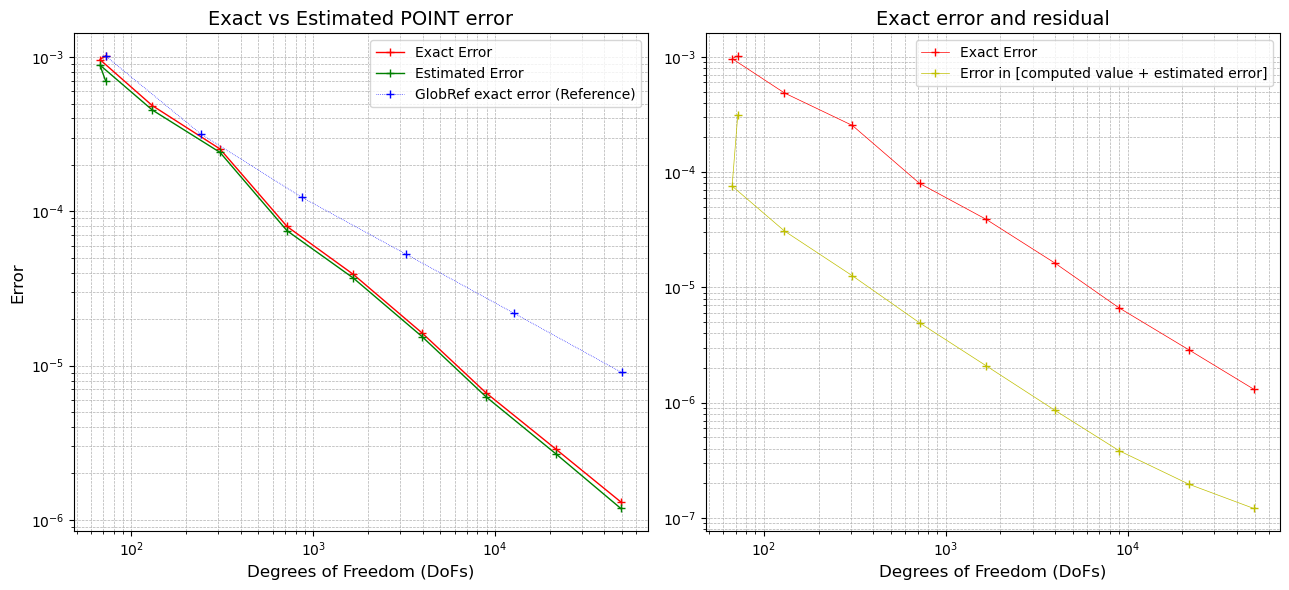

In [9]:
make_plots("./results/config-2/convergence_results.csv","./results/config-1/convergence_results.csv")